An outlier is a single observation “far away” from rest of the data.

REASONS FOR OUTLIERS:
* Errors
    * Data errors
    * Sampling error
    * Standardization failure
    * Faulty distributional assumptions
    * Human Error
* Genuine Outliers

*** Outlier can drastically bias/change the fit estimates and predictions.***

In [1]:
# Inject outliers into data.
cars1 <- cars[1:30, ]  # original data
cars_outliers <- data.frame(speed=c(19,19,20,20,20), dist=c(190, 186, 210, 220, 218))  # introduce outliers.
cars2 <- rbind(cars1, cars_outliers)  # data with outliers.

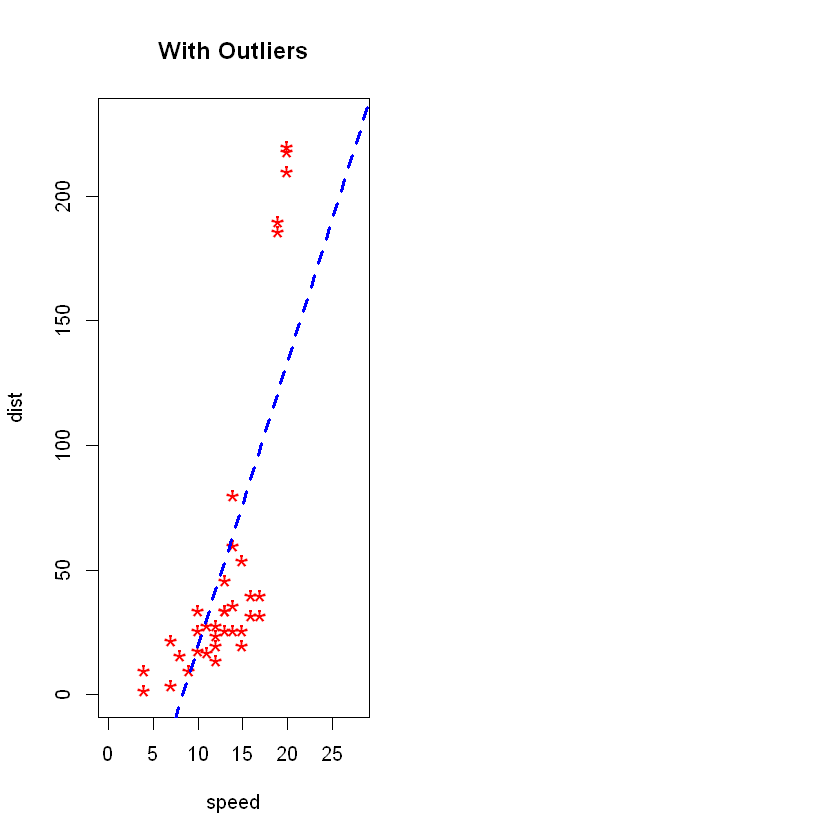

In [2]:
# Plot of data with outliers.
par(mfrow=c(1, 2))
plot(cars2$speed, cars2$dist, xlim=c(0, 28), ylim=c(0, 230), main="With Outliers", xlab="speed", ylab="dist", pch="*", col="red", cex=2)
abline(lm(dist ~ speed, data=cars2), col="blue", lwd=3, lty=2)

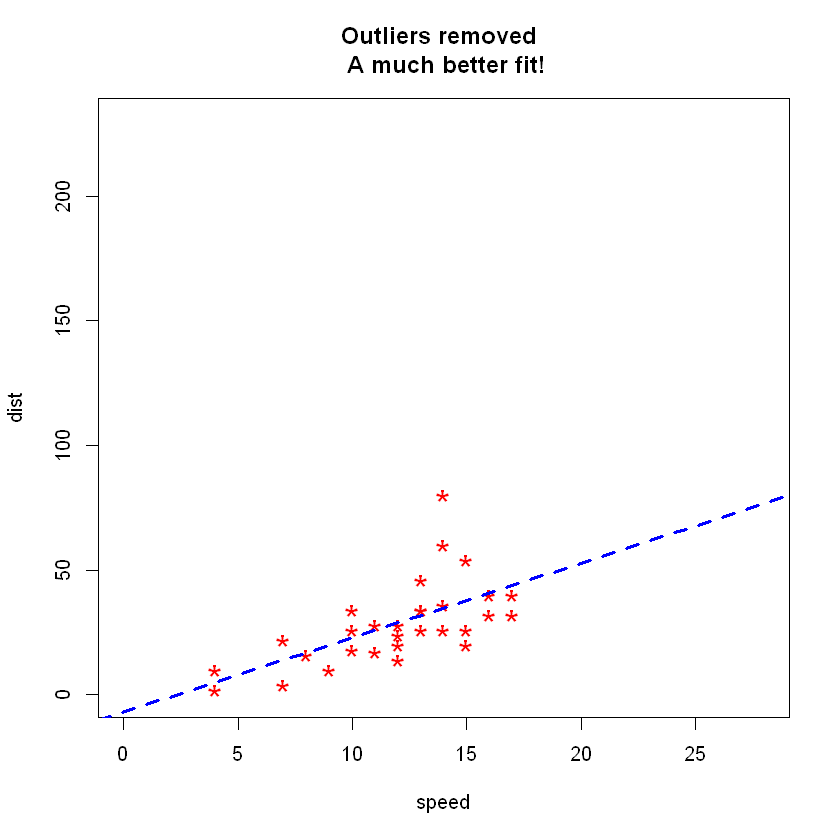

In [3]:
# Plot of original data without outliers. Note the change in slope (angle) of best fit line.
plot(cars1$speed, cars1$dist, xlim=c(0, 28), ylim=c(0, 230), main="Outliers removed \n A much better fit!", xlab="speed", ylab="dist", pch="*", col="red", cex=2)
abline(lm(dist ~ speed, data=cars1), col="blue", lwd=3, lty=2)

### Detect outliers
#### Univariate approach
For a given continuous variable, outliers are those observations that lie outside 1.5 * IQR, where IQR, the ‘Inter Quartile Range’ is the difference between 75th and 25th quartiles. Look at the points outside the whiskers in below box plot.

In [5]:
url <- "ozone.csv"  
inputData <- read.csv(url)  # import data

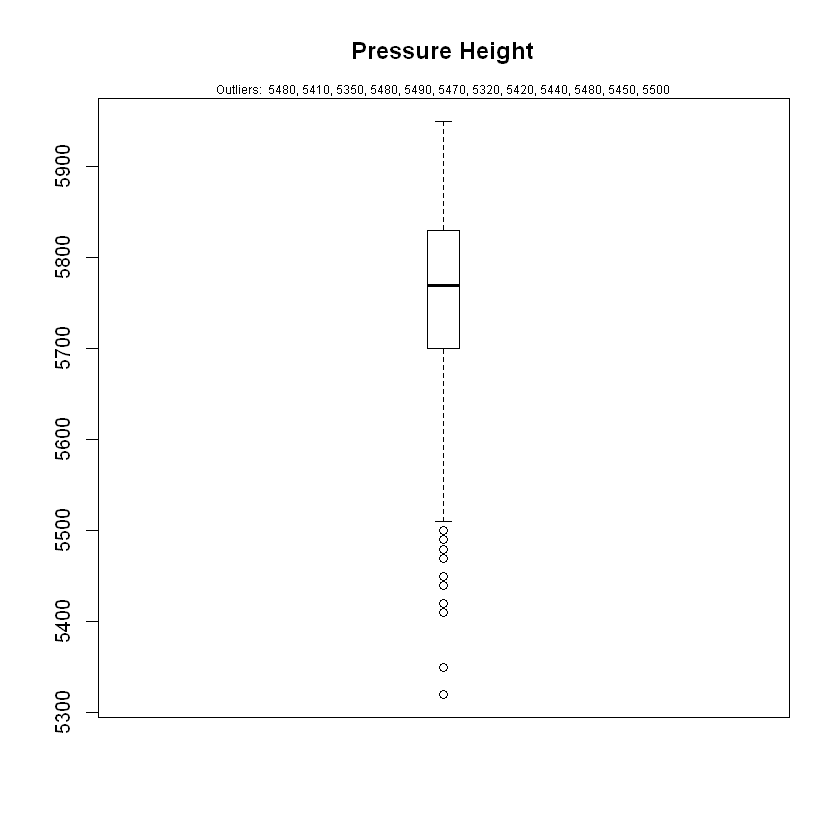

In [6]:
outlier_values <- boxplot.stats(inputData$pressure_height)$out  # outlier values.
boxplot(inputData$pressure_height, main="Pressure Height", boxwex=0.1)
mtext(paste("Outliers: ", paste(outlier_values, collapse=", ")), cex=0.6)

#### Bivariate approach
Visualize in box-plot of the X and Y, for categorical X’s

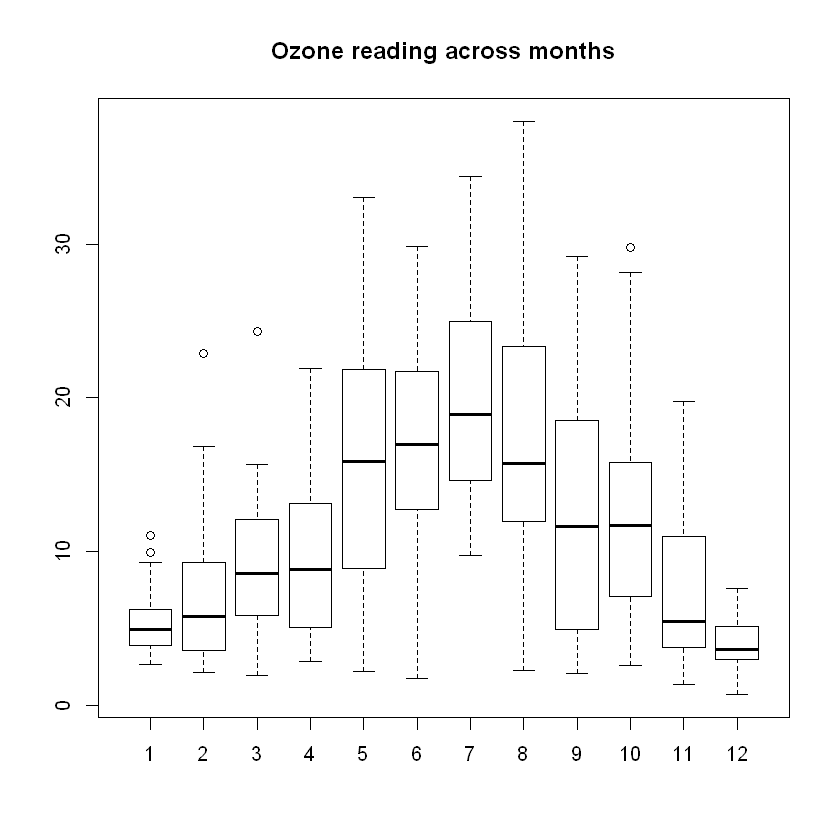

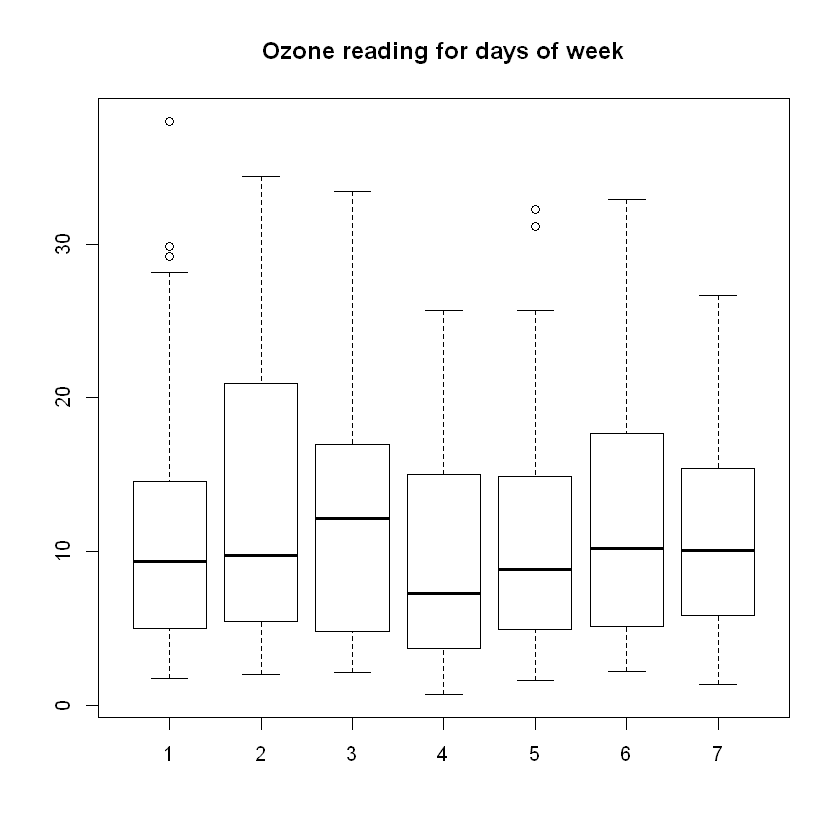

In [7]:
# For categorical variable
ozone <- read.csv(url)
boxplot(ozone_reading ~ Month, data=ozone, main="Ozone reading across months")  # clear pattern is noticeable.
boxplot(ozone_reading ~ Day_of_week, data=ozone, main="Ozone reading for days of week")  # this may not be significant, as day of week variable is a subset of the month var.

*** For continuous variable (convert to categorical if needed.) ***

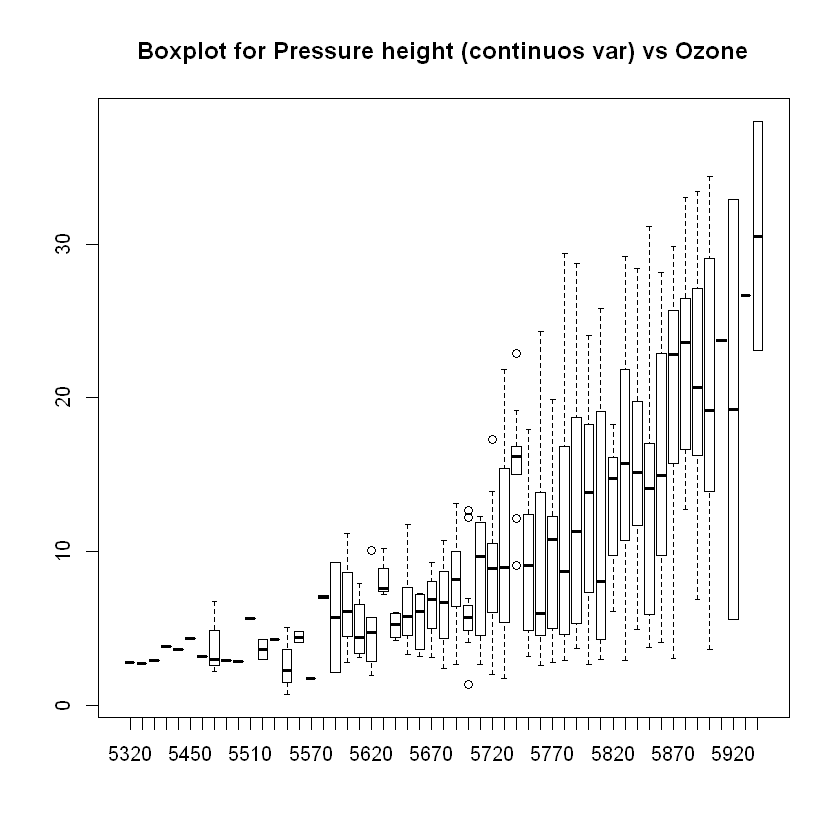

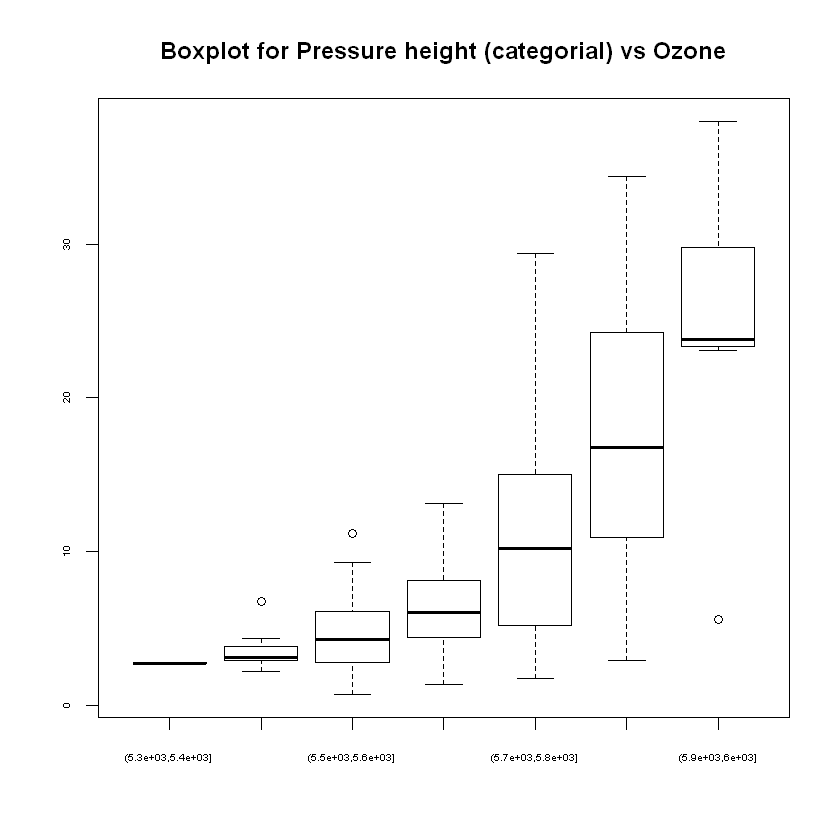

In [8]:

boxplot(ozone_reading ~ pressure_height, data=ozone, main="Boxplot for Pressure height (continuos var) vs Ozone")
boxplot(ozone_reading ~ cut(pressure_height, pretty(inputData$pressure_height)), data=ozone, main="Boxplot for Pressure height (categorial) vs Ozone", cex.axis=0.5)

### Multivariate Model Approach
Declaring an observation as an outlier based on a just one (rather unimportant) feature could lead to unrealistic inferences. When you have to decide if an individual entity (represented by row or observation) is an extreme value or not, it better to collectively consider the features (X’s) that matter. 

#### Cooks Distance

Cook’s distance is a measure computed with respect to a given regression model and therefore is impacted only by the X variables included in the model. But, what does cook’s distance mean? It computes the influence exerted by each data point (row) on the predicted outcome.

The cook’s distance for each observation i measures the change in Y^Y^ (fitted Y) for all observations with and without the presence of observation i, so we know how much the observation i impacted the fitted values. Mathematically, cook’s distance Di for observation i is computed as:

![](cook.png)

where,

* Y^j is the value of jth fitted response when all the observations are included.
* Y^j(i) is the value of jth fitted response, where the fit does not include observation i.
* MSE is the mean squared error.
* p is the number of coefficients in the regression model.

In [11]:
mod <- lm(ozone_reading ~ ., data=ozone)
cooksd <- cooks.distance(mod)

In general use, those observations that have a cook’s distance greater than 4 times the mean may be classified as influential. This is not a hard boundary.

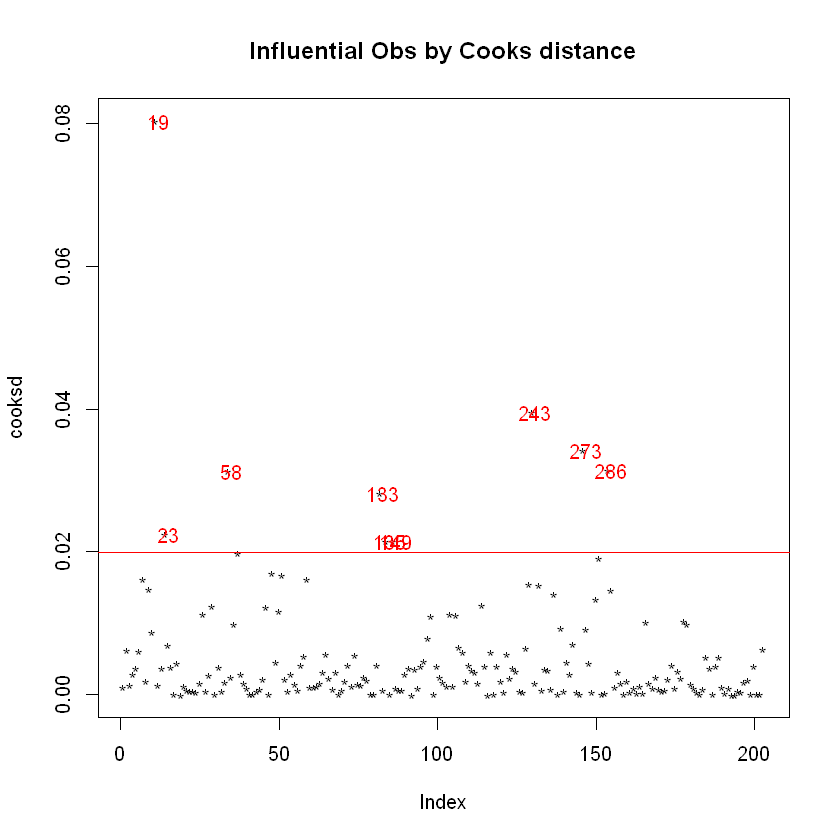

In [13]:
plot(cooksd, pch="*", cex=1, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

Now lets find out the influential rows from the original data. 

In [14]:
influential <- as.numeric(names(cooksd)[(cooksd > 4*mean(cooksd, na.rm=T))])  # influential row numbers
head(ozone[influential, ])  # influential observations.

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
19,1,19,1,4.07,5680,5,73,52,56.48,393,-68,69.80,10
23,1,23,5,4.90,5700,5,59,69,51.08,3044,18,52.88,150
58,2,27,5,22.89,5740,3,47,53,58.82,885,-4,67.10,80
133,5,12,3,33.04,5880,3,80,80,73.04,436,0,86.36,40
135,5,14,5,31.15,5850,4,76,78,71.24,1181,50,79.88,17
149,5,28,5,4.82,5750,3,76,65,51.08,3644,86,59.36,70


* Row 58, 133, 135 have very high ozone_reading.
* Rows 23, 135 and 149 have very high Inversion_base_height.
* Row 19 has very low Pressure_gradient.

### Outliers Test
The function outlierTest from car package gives the most extreme observation based on the given model. Here’s an example based on the mod linear model object we’d just created.

In [15]:
car::outlierTest(mod)


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferonni p
243 3.045756          0.0026525      0.53845

In [16]:
ozone[243,]

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
243,8,30,1,37.98,5950,5,62,92,82.4,557,0,90.68,70


### Treating the outliers
Once the outliers are identified and you have decided to make amends as per the nature of the problem, you may consider one of the following approaches.

#### 1. Imputation

Imputation with mean / median / mode. This method has been dealt with in detail in the discussion about treating missing values.

#### 2. Capping

For missing values that lie outside the 1.5 * IQR limits, we could cap it by replacing those observations outside the lower limit with the value of 5th %ile and those that lie above the upper limit, with the value of 95th %ile. Below is a sample code that achieves this.

In [17]:
x <- ozone$pressure_height
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

#### 3. Prediction

In yet another approach, the outliers can be replaced with missing values (NA) and then can be predicted by considering them as a response variable. 